## Credit Card Fraud Detection

**Done by:**<br>Gabriel Egbenya<br>Credit Card Fraud Detection<br>AKA devgabriel

##### Introduction:

This data set is enconded, so we wont be finding time series instead we will redirect our focus on random forest classifiers,extra tress classifier,adaboost etc and neural networks. .


This analysis looks at two major questions;

How to detect credit card fraud? Which model is best for credit card fraud detection?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

## Load dataset

In [2]:
fileName = "creditcard.csv"
creditcard_df = pd.read_csv(fileName)
creditcard_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#To display all the columns header.

pd.set_option('display.max_columns',31)
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Inspection

In [4]:
#printing the shape of the data

print("Shape of Fraud Data: {}".format(creditcard_df.shape))

Shape of Fraud Data: (284807, 31)


In [5]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#check for missing values.

creditcard_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#viewing the unique data in all columns in the dataset

print(creditcard_df.nunique().sort_values(ascending=True).reset_index(name='count'))

     index   count
0    Class       2
1   Amount   32767
2     Time  124592
3       V3  275663
4      V28  275663
5      V27  275663
6      V26  275663
7      V25  275663
8      V24  275663
9      V23  275663
10     V22  275663
11     V21  275663
12     V20  275663
13     V19  275663
14     V18  275663
15     V17  275663
16     V16  275663
17      V1  275663
18     V14  275663
19     V13  275663
20     V12  275663
21     V11  275663
22     V10  275663
23      V9  275663
24      V8  275663
25      V7  275663
26      V6  275663
27      V5  275663
28      V4  275663
29      V2  275663
30     V15  275663


In [9]:
#check the data in the target column

print(creditcard_df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


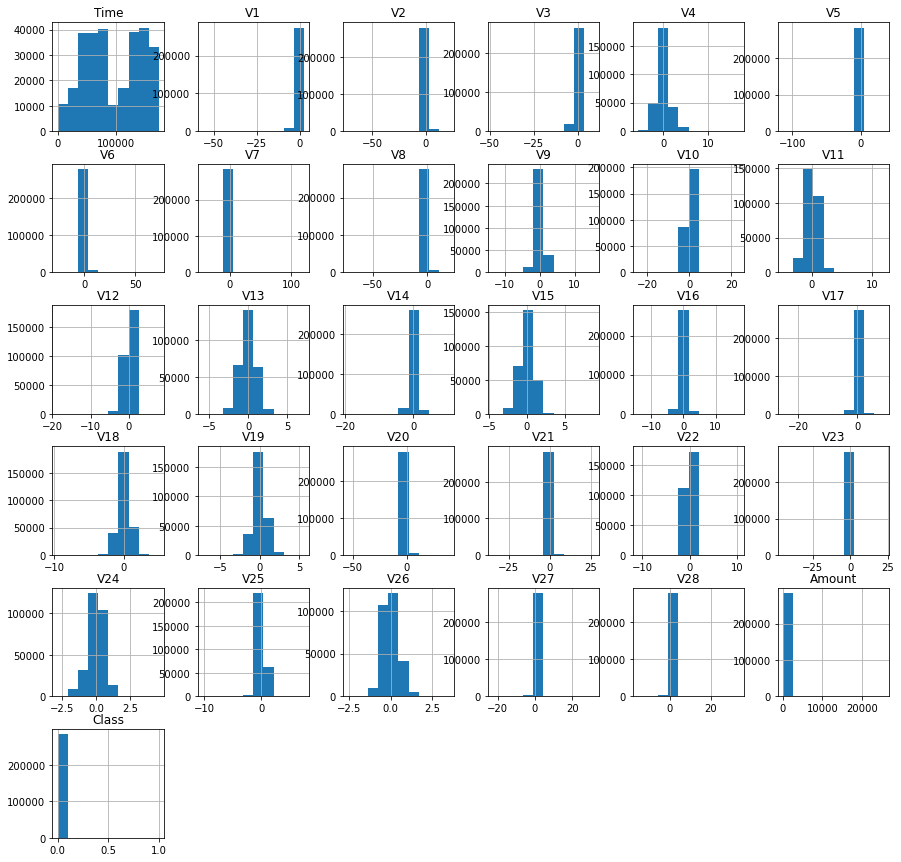

In [10]:
#visualise the data using histogram

creditcard_df.hist(figsize=(15,15))
plt.show()

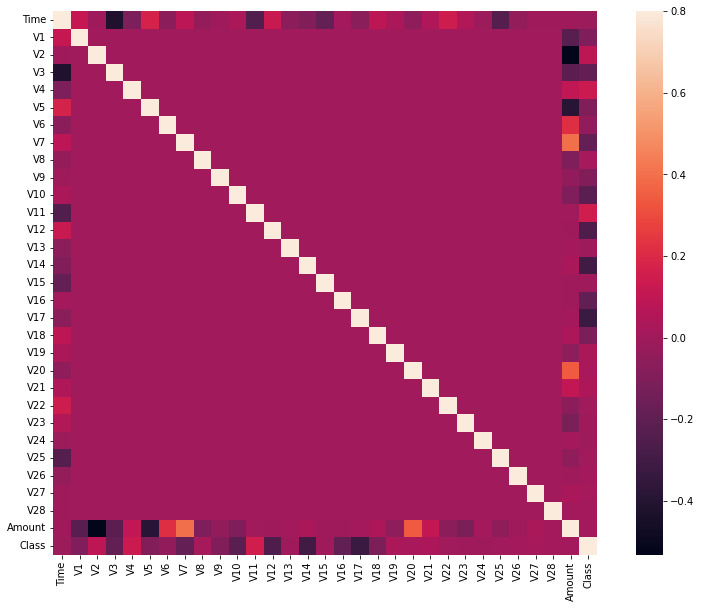

In [11]:
#correlation matrix
cormat = creditcard_df.corr()
fig = plt.figure(figsize = (14, 10))

#Plotting a heatmap to visualize the correlation matrix and see features 
# with strong correlation to the target class
sns.heatmap(cormat, vmax=.8, square=True);
plt.show()

In [12]:
cormat['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

## Feature selection/importances

In [13]:
print(f"The Original DataFrame has: {len(cormat['Class'])} columns")

# select columns whose correlation score is > 0.01 or < -0.01, you can chose a different constant and experiment

cols = cormat.keys()
cols_to_keep = []

for i in range(len(cormat)):
    
    if abs(cormat['Class'][i]) > 0.01:
        
        cols_to_keep.append(cols[i])

print(f"The New DataFrame has: {len(cols_to_keep)} columns") # the final features list we wish to keep

The Original DataFrame has: 31 columns
The New DataFrame has: 22 columns


In [14]:
creditcard_df = creditcard_df[cols_to_keep]
print(f"The New DataFrame has: \n {creditcard_df.shape} columns") # the final features list we wish to keep

The New DataFrame has: 
 (284807, 22) columns


In [15]:

valid_trans = creditcard_df['Class'].value_counts()[0]
fraud_trans = creditcard_df['Class'].value_counts()[1]

print(f"Number of Non-fraudulent transactions: {valid_trans}")
print(f"Number of fraudulent transactions: {fraud_trans}")
print(f"")
print(f"% number of fraud transactions: {round((fraud_trans / len(creditcard_df)),5) * 100}")
print(f"% number of valid transactions: {round((valid_trans / len(creditcard_df)), 4) * 100}")

Number of Non-fraudulent transactions: 284315
Number of fraudulent transactions: 492

% number of fraud transactions: 0.173
% number of valid transactions: 99.83


##  Split the data into features and response.

In [16]:
#create the features DataFrame
features = creditcard_df.drop('Class', axis=1)

#create the response 
response = creditcard_df['Class']

#split the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, response, 
                                                    test_size=0.2, random_state=42)


In [17]:
#view the training set shape. Remember we dont want to view the test set until we are ready to train our model.

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (227845, 21)
Shape of y_train: (227845,)
Shape of X_test: (56962, 21)
Shape of y_test: (56962,)


## Build the  models

### Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

#instantiated an object from the DecisionTreeClassifier called dec_tree_clf and fit it
dec_tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

#fit the model
%time dec_tree_clf.fit(X_train,y_train)

#make prediction using the fitted model
pred_dec_tree_clf = dec_tree_clf.predict(X_test)

Wall time: 2.69 s


In [19]:
from sklearn.metrics import accuracy_score

#calculate the accuracy score
acc_score = accuracy_score(y_test, pred_dec_tree_clf)

print('Accuracy score for DecisionTreeClassifier:  %s' % round(acc_score, 7))

Accuracy score for DecisionTreeClassifier:  0.9994382


### Please NOTE: I could have as well instantiate an object of GridSearchCV class to find the best hyper parameter in the models, then use the parameter to train the model but that will not be necessary for this project.

In [20]:
# # -----
# # Coarse-Grained RandomForestRegressor GridSearch
# # -----

# #Here I instantiate an object of GridSearchCV class called grid_search_cv with random_state of 42, and set cv=3.
# from sklearn.model_selection import GridSearchCV

# param_grid = [{'max_depth':[1,2,3,4,5,8], 
#                'max_leaf_nodes': list(range(2, 20, 1)), 
#                'min_samples_split':[2,3,4,5] }]

# randf_clf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
#                               param_grid, 
#                               verbose=1, 
#                               cv=3)

# #Here I call the fit() method to perform grid search using 3-fold validation.
# randf_clf_grid.fit(X_train,y_train)
# print("The best parameters are: ", randf_clf_grid.best_params_)

### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

#instantiated an object from the RandomForestClassifier called randf_clf and fit it
randf_clf = RandomForestClassifier(random_state=42)

#fit the model
%time randf_clf.fit(X_train, y_train)

#make prediction using the fitted model
pred_randf_clf = randf_clf.predict(X_test)

Wall time: 3min 46s


In [22]:
#calculate the accuracy score
acc_score_randf = accuracy_score(y_test, pred_randf_clf)

print('Accuracy score for RandomForestClassifier:  %s' % round(acc_score_randf, 7))

Accuracy score for RandomForestClassifier:  0.9995611


### Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gradboost_clf = GradientBoostingClassifier(n_estimators=10, max_depth=3, random_state=42)
%time gradboost_clf.fit(X_train, y_train)

pred_gradboost_clf = gradboost_clf.predict(X_test)

Wall time: 32.1 s


In [24]:
#calculate the accuracy score
acc_score_gradboost = accuracy_score(y_test, pred_gradboost_clf)

print('Accuracy score for GradientBoostingClassifier:  %s' % round(acc_score_gradboost, 7))

Accuracy score for GradientBoostingClassifier:  0.9990871


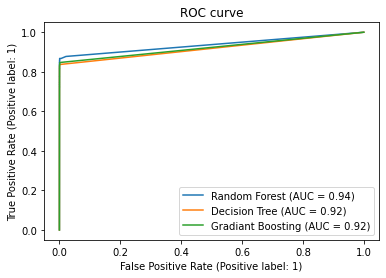

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("Random Forest", randf_clf),
    ("Decision Tree", dec_tree_clf),
    ("Gradiant Boosting", gradboost_clf),
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")

In [26]:
from sklearn.metrics import classification_report

n_errors_dec_tree = (pred_dec_tree_clf != y_test).sum()
print(f"Decision Tree Classifier \nNumber of Errors = {n_errors_dec_tree}")
print(f"accuracy score: {round(acc_score, 7)*100}%")
print(classification_report(y_test, pred_dec_tree_clf))

print("*" *65)

n_errors_randf = (pred_randf_clf != y_test).sum()
print(f"Random Forest Classifier \nNumber of Errors = {n_errors_randf}")
print(f"accuracy score: {round(acc_score_randf, 7)*100}%")
clf_report = classification_report(y_test, pred_randf_clf)
print(clf_report)

print("*" *65)

n_errors_gboost = (pred_gradboost_clf != y_test).sum()
print(f"Gradient Boosting Classifier \nNumber of Errors = {n_errors_gboost}")
print("Gradient Boosting Classifier")
print(f"accuracy score: {round(acc_score_gradboost, 7)*100}%")
clf_report = classification_report(y_test, pred_gradboost_clf)
print(clf_report)

Decision Tree Classifier 
Number of Errors = 32
accuracy score: 99.94382%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.81      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

*****************************************************************
Random Forest Classifier 
Number of Errors = 25
accuracy score: 99.95611%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

*****************************************************************
Gradient Boosting Classifier 
Number of Errors = 52
Gradient Boost

## Final Model Selection and Justification

Based on critical analysis,  Random Forest Classifier best characterizes this data because it has the  the best Area under ROC Curve and Accuracy. Also, it made the lowest number of errors when compared to the other two models. So we can go ahead and deploy this model using this classifier